In [11]:
#load data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt   

import numpy as np

#ensure that following files are in the existing directorary 
path = "data/"


In [12]:
def classification_report_and_confusion_matrix(true_vals, pred_vals, label_list):
    """prints classification report and confusion matrix from list of gold values, 
    list of predicted values, and possible labels in classification
    """
    print(classification_report(true_vals, pred_vals,label_list))

    cm = confusion_matrix(true_vals, pred_vals,  labels=label_list)
    print("CONFUSION MATRIX: ")
    print(cm)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, fmt='g'); #annot=True to annotate cells, fmt='g' to get rid of scientific notation

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(label_list); ax.yaxis.set_ticklabels(label_list);

In [13]:
train_data = pd.read_csv(path + "train.tsv", sep="\t", header=0)

dev_data = pd.read_csv(path + "dev.tsv", sep="\t", header=0)

test_data = pd.read_csv(path + "test.tsv", sep="\t", header=0)


In [14]:
#define vectorizer
vectorizer = CountVectorizer(
analyzer="word",
lowercase=False,
)

In [15]:
X_train_data = train_data["tweet_text"]
y_train = train_data["annotations"]
X_train =vectorizer.fit_transform(X_train_data).toarray()

X_dev_data = dev_data["tweet_text"]
y_dev = dev_data["annotations"]
X_dev = vectorizer.transform(X_dev_data).toarray()

X_test_data = test_data["tweet_text"]
y_test = test_data["annotations"]
X_test = vectorizer.transform(X_test_data).toarray()


BASELINE - DUMMY CLASSIFIER (DEV): 
              precision    recall  f1-score   support

      racist       0.00      0.00      0.00        25
  non-racist       0.89      1.00      0.94       195

    accuracy                           0.89       220
   macro avg       0.44      0.50      0.47       220
weighted avg       0.79      0.89      0.83       220

CONFUSION MATRIX: 
[[  0  25]
 [  0 195]]


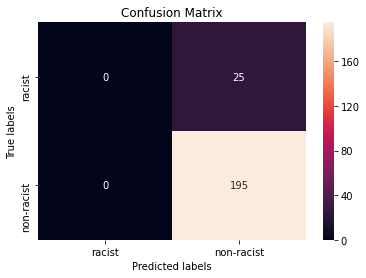

In [16]:
#DUMMY CLASSIFIER - TRAIN AND DEV
dummy_clf = DummyClassifier(strategy="most_frequent").fit(X_train, y_train)
y_dummy_pred = dummy_clf.predict(X_dev).tolist()


print("BASELINE - DUMMY CLASSIFIER (DEV): ")

classification_report_and_confusion_matrix(y_dev, y_dummy_pred, ["racist", "non-racist"])

BASELINE - DUMMY CLASSIFIER (TEST): 
              precision    recall  f1-score   support

      racist       0.00      0.00      0.00        18
  non-racist       0.75      1.00      0.86        54

    accuracy                           0.75        72
   macro avg       0.38      0.50      0.43        72
weighted avg       0.56      0.75      0.64        72

CONFUSION MATRIX: 
[[ 0 18]
 [ 0 54]]


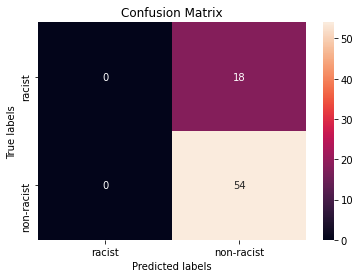

In [17]:
#DUMMY CLASSIFIER - TEST

print("BASELINE - DUMMY CLASSIFIER (TEST): ")
y_dummy_test = dummy_clf.predict(X_test).tolist()
classification_report_and_confusion_matrix(y_test, y_dummy_test, ["racist", "non-racist"])

CNN MODEL (DEV):
              precision    recall  f1-score   support

      racist       0.10      0.32      0.15        25
  non-racist       0.88      0.63      0.73       195

    accuracy                           0.60       220
   macro avg       0.49      0.48      0.44       220
weighted avg       0.79      0.60      0.67       220

CONFUSION MATRIX: 
[[  8  17]
 [ 72 123]]


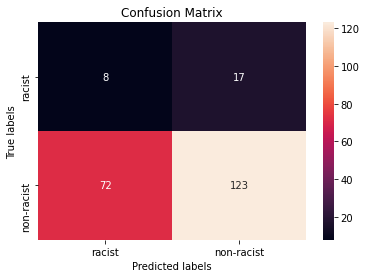

In [18]:
#CNN - DEV SET 

y_cnn_dev = ['racist', 'non-racist', 'non-racist', 'non-racist', 'racist', 'non-racist', 'non-racist', 'racist', 'non-racist', 'non-racist', 'racist', 'racist', 'racist', 'racist', 'non-racist', 'non-racist', 'racist', 'non-racist', 'racist', 'racist', 'non-racist', 'racist', 'non-racist', 'racist', 'non-racist', 'non-racist', 'non-racist', 'racist', 'racist', 'non-racist', 'non-racist', 'racist', 'racist', 'racist', 'racist', 'racist', 'racist', 'racist', 'non-racist', 'racist', 'non-racist', 'racist', 'non-racist', 'racist', 'non-racist', 'non-racist', 'non-racist', 'non-racist', 'non-racist', 'non-racist', 'racist', 'racist', 'racist', 'racist', 'racist', 'non-racist', 'non-racist', 'racist', 'non-racist', 'racist', 'non-racist', 'non-racist', 'non-racist', 'non-racist', 'racist', 'non-racist', 'non-racist', 'non-racist', 'non-racist', 'non-racist', 'non-racist', 'racist', 'non-racist', 'non-racist', 'non-racist', 'non-racist', 'non-racist', 'non-racist', 'non-racist', 'non-racist', 'non-racist', 'racist', 'non-racist', 'racist', 'non-racist', 'non-racist', 'non-racist', 'racist', 'non-racist', 'non-racist', 'non-racist', 'non-racist', 'racist', 'racist', 'racist', 'non-racist', 'non-racist', 'non-racist', 'non-racist', 'racist', 'non-racist', 'racist', 'non-racist', 'non-racist', 'non-racist', 'racist', 'non-racist', 'non-racist', 'non-racist', 'non-racist', 'non-racist', 'racist', 'racist', 'racist', 'non-racist', 'racist', 'non-racist', 'non-racist', 'racist', 'racist', 'non-racist', 'racist', 'racist', 'non-racist', 'non-racist', 'non-racist', 'non-racist', 'non-racist', 'non-racist', 'non-racist', 'racist', 'non-racist', 'racist', 'non-racist', 'non-racist', 'non-racist', 'non-racist', 'non-racist', 'non-racist', 'non-racist', 'non-racist', 'non-racist', 'non-racist', 'non-racist', 'non-racist', 'non-racist', 'non-racist', 'racist', 'non-racist', 'non-racist', 'racist', 'non-racist', 'non-racist', 'non-racist', 'non-racist', 'non-racist', 'racist', 'racist', 'racist', 'racist', 'non-racist', 'non-racist', 'non-racist', 'non-racist', 'racist', 'racist', 'racist', 'non-racist', 'non-racist', 'non-racist', 'non-racist', 'racist', 'non-racist', 'non-racist', 'racist', 'non-racist', 'non-racist', 'non-racist', 'racist', 'racist', 'non-racist', 'non-racist', 'non-racist', 'racist', 'non-racist', 'non-racist', 'non-racist', 'non-racist', 'non-racist', 'racist', 'non-racist', 'non-racist', 'non-racist', 'non-racist', 'non-racist', 'racist', 'racist', 'racist', 'racist', 'non-racist', 'racist', 'non-racist', 'racist', 'non-racist', 'non-racist', 'non-racist', 'non-racist', 'racist', 'non-racist', 'non-racist', 'non-racist', 'racist', 'non-racist', 'racist', 'non-racist', 'non-racist', 'racist', 'racist', 'racist', 'racist']
# print("DEV TEST - num of preds: ", len(y_cnn_dev))
print("CNN MODEL (DEV):")
classification_report_and_confusion_matrix(y_dev, y_cnn_dev, ["racist", "non-racist"])

CNN MODEL (TEST):
              precision    recall  f1-score   support

      racist       0.19      0.28      0.22        18
  non-racist       0.71      0.59      0.65        54

    accuracy                           0.51        72
   macro avg       0.45      0.44      0.43        72
weighted avg       0.58      0.51      0.54        72

CONFUSION MATRIX: 
[[ 5 13]
 [22 32]]


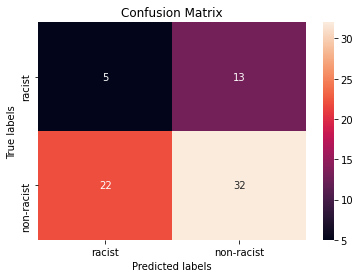

In [19]:
#FROM BEST MODEL - run on final model

y_cnn_test = ['non-racist',
 'non-racist',
 'non-racist',
 'non-racist',
 'non-racist',
 'non-racist',
 'non-racist',
 'non-racist',
 'racist',
 'non-racist',
 'non-racist',
 'non-racist',
 'non-racist',
 'non-racist',
 'racist',
 'racist',
 'non-racist',
 'non-racist',
 'non-racist',
 'racist',
 'racist',
 'non-racist',
 'non-racist',
 'non-racist',
 'non-racist',
 'non-racist',
 'non-racist',
 'racist',
 'non-racist',
 'racist',
 'racist',
 'non-racist',
 'non-racist',
 'non-racist',
 'racist',
 'racist',
 'non-racist',
 'non-racist',
 'racist',
 'racist',
 'non-racist',
 'non-racist',
 'non-racist',
 'non-racist',
 'non-racist',
 'racist',
 'non-racist',
 'non-racist',
 'racist',
 'non-racist',
 'racist',
 'non-racist',
 'racist',
 'non-racist',
 'racist',
 'racist',
 'racist',
 'racist',
 'non-racist',
 'non-racist',
 'non-racist',
 'non-racist',
 'racist',
 'non-racist',
 'racist',
 'racist',
 'non-racist',
 'non-racist',
 'racist',
 'racist',
 'racist',
 'racist']

print("CNN MODEL (TEST):")
classification_report_and_confusion_matrix(y_test, y_cnn_test, ["racist", "non-racist"])